In [1]:
import pandas as pd
import numpy as np
import csv
import json
import pickle
import tqdm
import japanize_matplotlib

In [2]:
import plotly.express as px

In [3]:
import  matplotlib.pyplot as plt
from statistics import mean
#結果
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# テキストの取得
#企業リストを取得
#企業リストを取得
company_list = pd.read_csv("../data/new2/df_achieve/company_list.csv",index_col=0)
company_list=company_list.drop(14350)
company_list=company_list.drop(52080)
company_list=company_list.drop(95080)
with open('../data/text_data_ver2/non_company_list.pkl', 'rb') as f:
    non_list = pickle.load(f)
for com in non_list:
    company_list=company_list.drop(com)

In [5]:
class_dic={}
for clas in company_list["class"]:
    if clas in class_dic.keys():
        class_dic[clas]+=1
    else:
        class_dic[clas]=1
print(class_dic)

{'水産・農林業': 8, '建設業': 118, '非鉄金属': 26, '鉱業': 5, '機械': 162, '情報・通信業': 306, '食料品': 81, 'サービス業': 316, '陸運業': 23, 'その他金融業': 15, '卸売業': 234, '小売業': 178, '不動産業': 88, '繊維製品': 42, '電気機器': 176, '石油・石炭製品': 9, '化学': 155, '金属製品': 64, 'パルプ・紙': 19, 'その他製品': 76, '医薬品': 23, 'ゴム製品': 8, '精密機器': 34, 'ガラス・土石製品': 39, '鉄鋼': 28, '輸送用機器': 58, '証券、商品先物取引業': 14, '保険業': 3, '倉庫・運輸関連': 16, '海運業': 10, '空運業': 4, '電気・ガス業': 17}


In [6]:
pop_list=[]
for company in company_list.index:
    if company_list["class"][company]=='その他金融業':
        pop_list.append(company)
    elif company_list["class"][company]=='証券、商品先物取引業':
        pop_list.append(company)
    elif company_list["class"][company]=='保険業':
        pop_list.append(company)

In [10]:
class_dic.pop('その他金融業')
class_dic.pop('証券、商品先物取引業')
class_dic.pop('保険業')

3

In [11]:
class_dic

{'水産・農林業': 8,
 '建設業': 118,
 '非鉄金属': 26,
 '鉱業': 5,
 '機械': 162,
 '情報・通信業': 306,
 '食料品': 81,
 'サービス業': 316,
 '陸運業': 23,
 '卸売業': 234,
 '小売業': 178,
 '不動産業': 88,
 '繊維製品': 42,
 '電気機器': 176,
 '石油・石炭製品': 9,
 '化学': 155,
 '金属製品': 64,
 'パルプ・紙': 19,
 'その他製品': 76,
 '医薬品': 23,
 'ゴム製品': 8,
 '精密機器': 34,
 'ガラス・土石製品': 39,
 '鉄鋼': 28,
 '輸送用機器': 58,
 '倉庫・運輸関連': 16,
 '海運業': 10,
 '空運業': 4,
 '電気・ガス業': 17}

In [7]:
for com in pop_list:
    company_list=company_list.drop(com)

In [8]:
#四半期込み
achieve=[]
score_all=[]
j_score_all=[]
f_score_all=[]
a=0
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if df["bert_score"][i]!=-1:
            if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
                if float(df["achieve"][i])>1:
                    print(company)
                    break

                a=float(df["achieve"][i])
                achieve.append(a)
                score_all.append(float(df["bert_score"][i]))
                f_score_all.append(float(df["f_score"][i]))
                j_score_all.append(float(df["j_score"][i]))

                #date.append(df.index[i])
            elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
                achieve.append(a)
                score_all.append(float(df["bert_score"][i]))
                f_score_all.append(float(df["f_score"][i]))
                j_score_all.append(float(df["j_score"][i]))
                #date_jf.append(df.index[i])

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


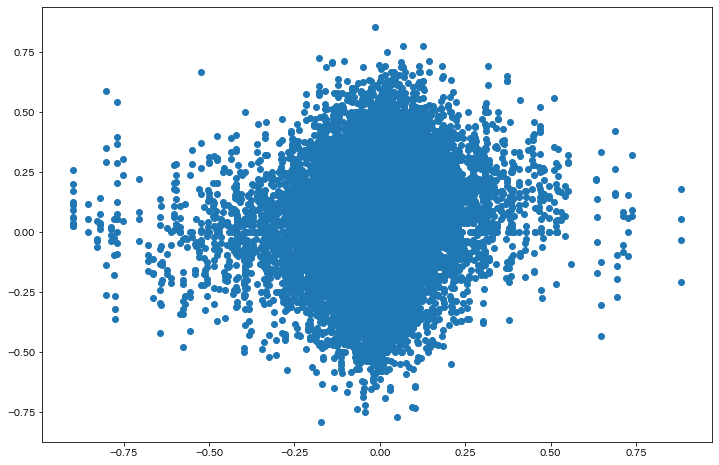

In [9]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,score_all)
plt.show()

In [45]:
np.corrcoef([achieve,score_all])

array([[1.        , 0.14493621],
       [0.14493621, 1.        ]])

In [31]:
#四半期込み
achieve_dic ={ k:[] for k in class_dic.keys()}
score_dic = { k:[] for k in class_dic.keys()}
a=0
clas = ""
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    clas=company_list["class"][company]
    
    for i in range(0,len(df)):
        if df["bert_score"][i]!=-1:
            if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
                if float(df["achieve"][i])>1:
                    print(company)
                    break

                a=float(df["achieve"][i])
                achieve_dic[clas].append(a)
                score_dic[clas].append(float(df["bert_score"][i]))
                
                #date.append(df.index[i])
            elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
                achieve_dic[clas].append(a)
                score_dic[clas].append(float(df["bert_score"][i]))
               

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


水産・農林業
企業数 8
相関係数 0.2023236525284987
感情値平均 0.07152374168583737
達成度平均 -0.016836931592367356


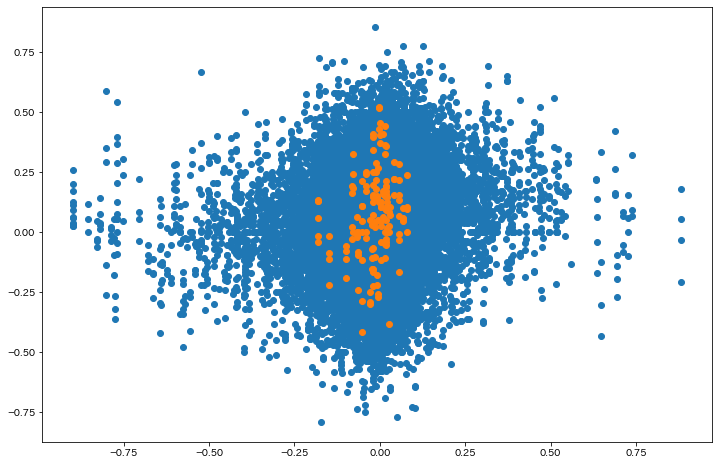

建設業
企業数 118
相関係数 0.06610161302768912
感情値平均 0.0039678002086934805
達成度平均 -0.00972614707303353


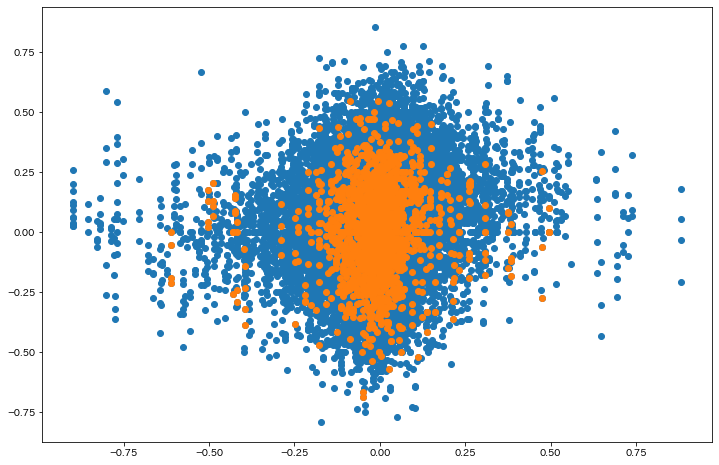

非鉄金属
企業数 26
相関係数 0.33363212107295037
感情値平均 0.06334540613114858
達成度平均 0.027468385104774565


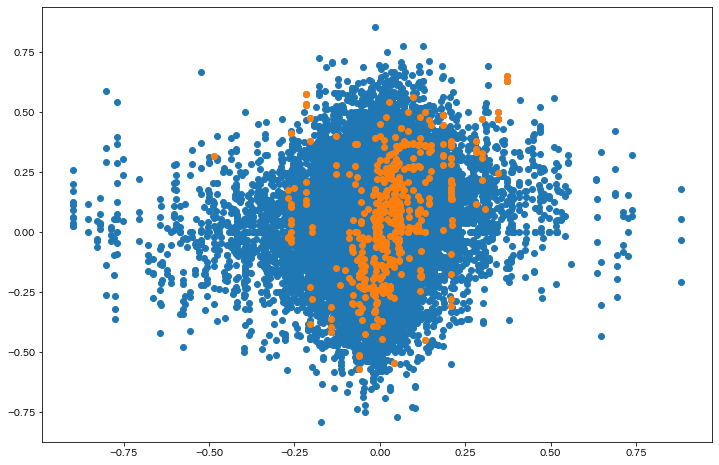

鉱業
企業数 5
相関係数 0.3204964346150944
感情値平均 0.03486645810903513
達成度平均 0.0255856511917833


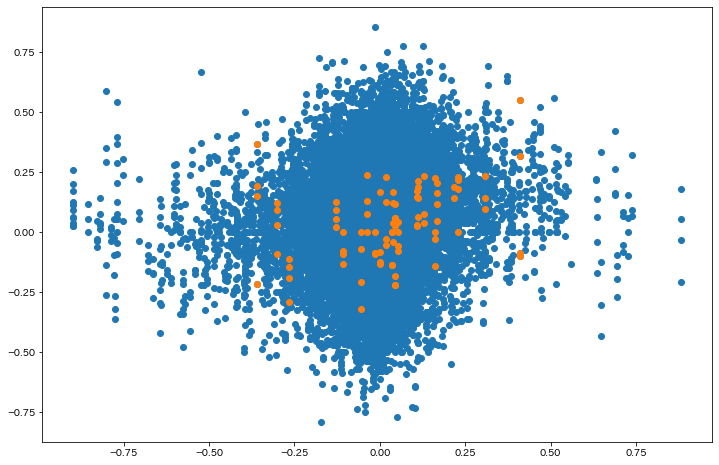

機械
企業数 162
相関係数 0.15549076101356488
感情値平均 0.0417988413430266
達成度平均 0.004148607213958013


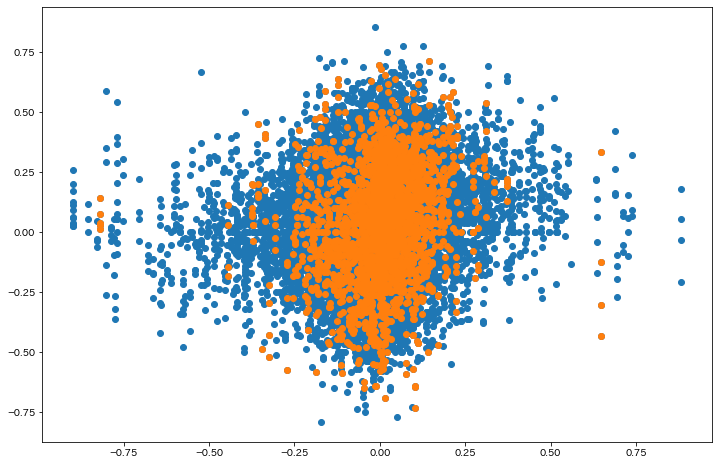

情報・通信業
企業数 306
相関係数 0.15653412232911362
感情値平均 0.07334747309415118
達成度平均 -0.021190549028568925


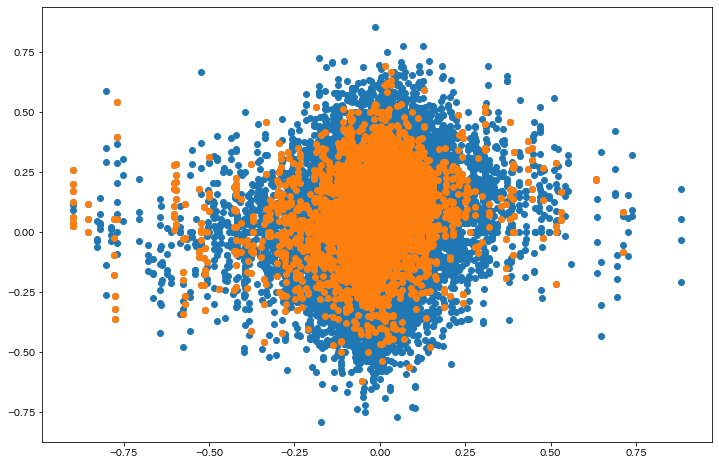

食料品
企業数 81
相関係数 0.23477335472368058
感情値平均 0.03500061443678614
達成度平均 -0.011190897126372834


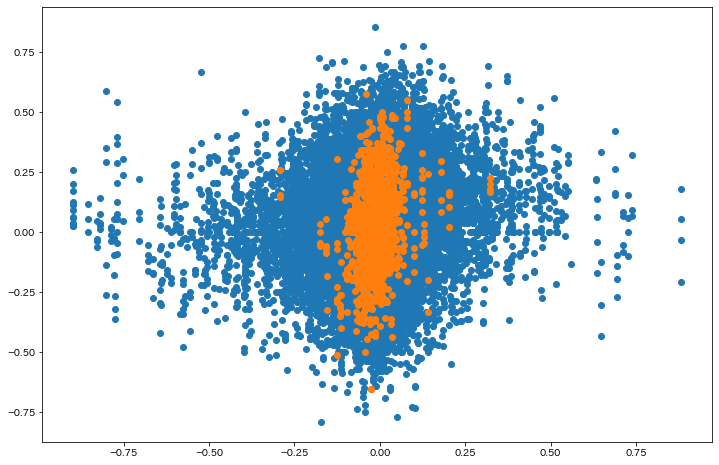

サービス業
企業数 316
相関係数 0.13710572817468528
感情値平均 0.05774954388786853
達成度平均 -0.020384509535037995


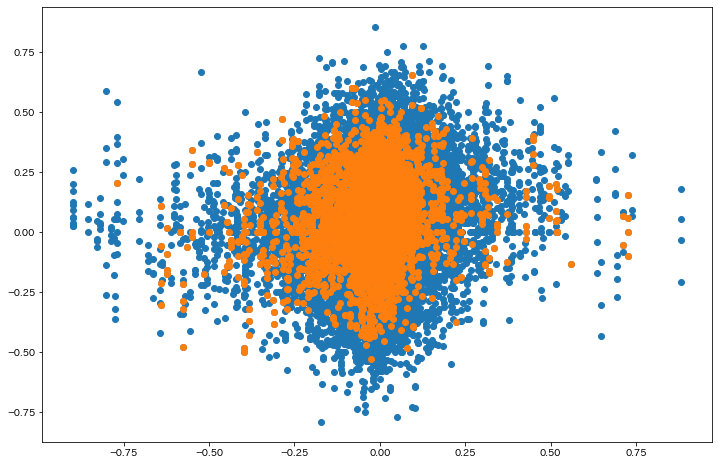

陸運業
企業数 23
相関係数 0.10621493575622148
感情値平均 0.07647430793823957
達成度平均 0.010602720167019837


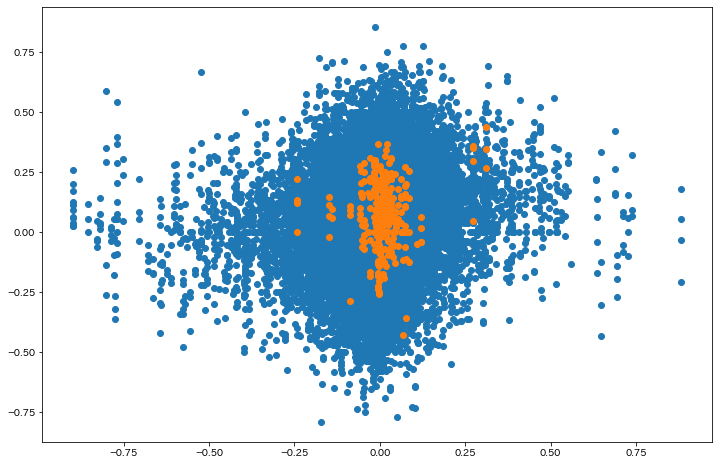

卸売業
企業数 234
相関係数 0.1372315937263049
感情値平均 0.05313194142704764
達成度平均 0.004382371033177807


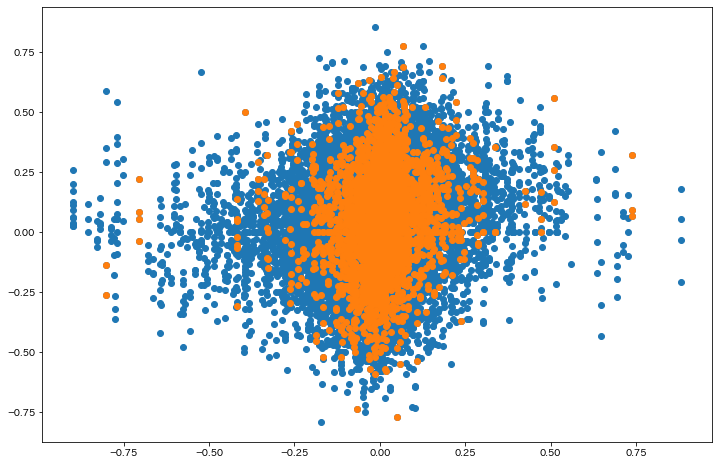

小売業
企業数 178
相関係数 0.07770500146662437
感情値平均 0.03337050533335144
達成度平均 -0.017695395591054805


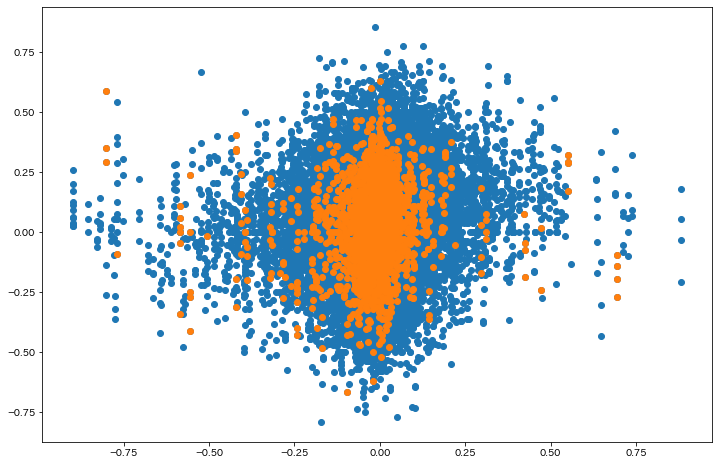

不動産業
企業数 88
相関係数 0.11250270605718492
感情値平均 0.058246482510757105
達成度平均 -0.027408778191619236


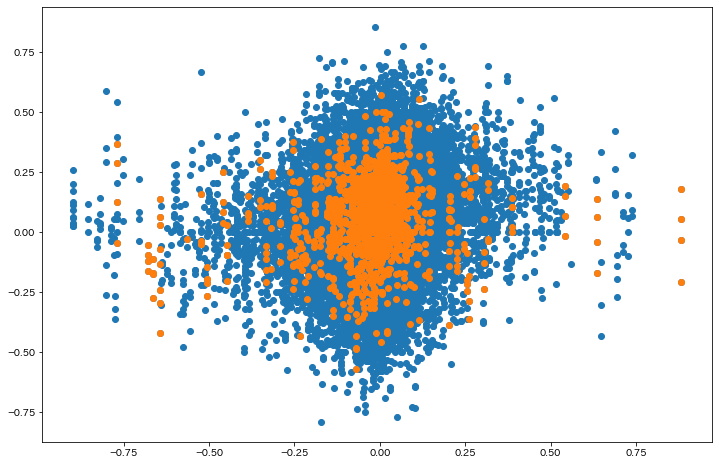

繊維製品
企業数 42
相関係数 0.07261249528493065
感情値平均 -0.022143964511706075
達成度平均 -0.026701964214764812


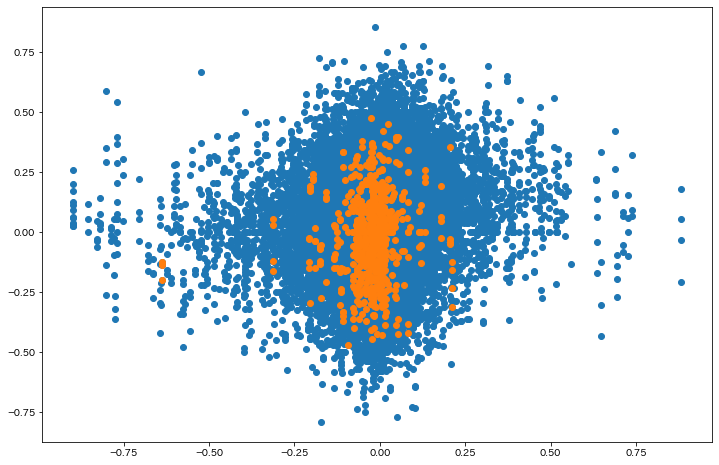

電気機器
企業数 176
相関係数 0.18558232064565242
感情値平均 0.051884827744689825
達成度平均 0.001520476442745624


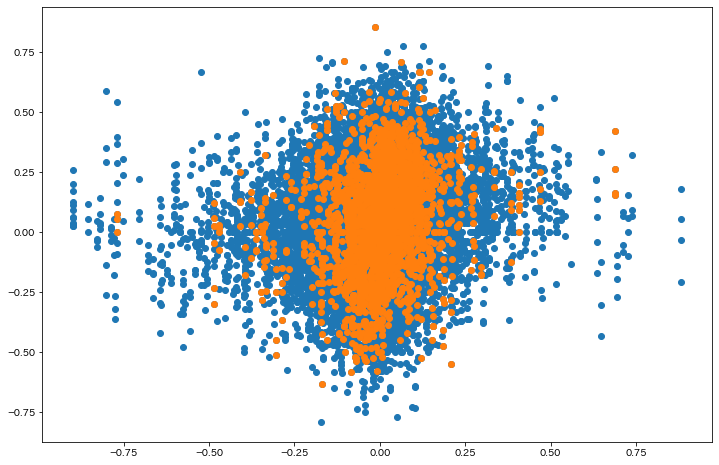

石油・石炭製品
企業数 9
相関係数 0.18834105419277317
感情値平均 0.049893655930922515
達成度平均 0.032847741417224845


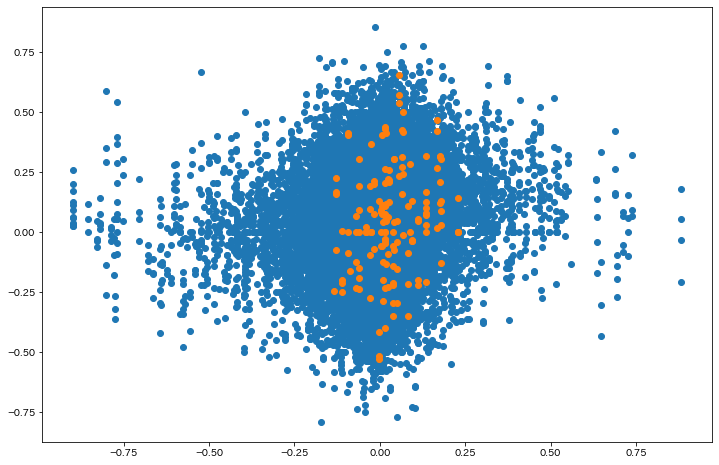

化学
企業数 155
相関係数 0.21314318697621396
感情値平均 0.056161578086913085
達成度平均 0.004694320950518817


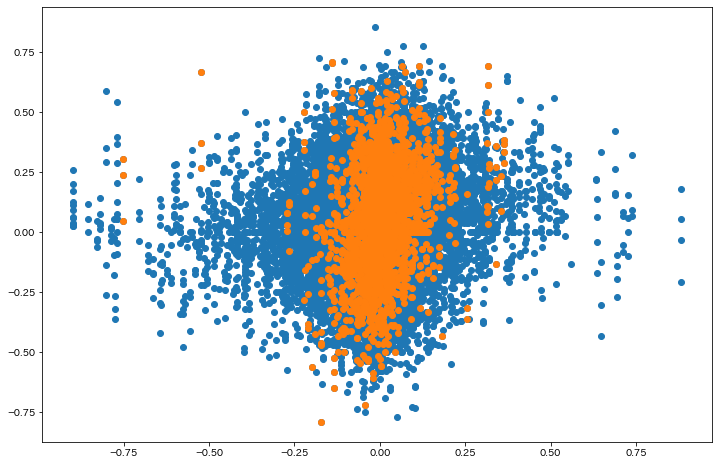

金属製品
企業数 64
相関係数 0.22197460086230555
感情値平均 0.0365139793614062
達成度平均 0.0077665239841308445


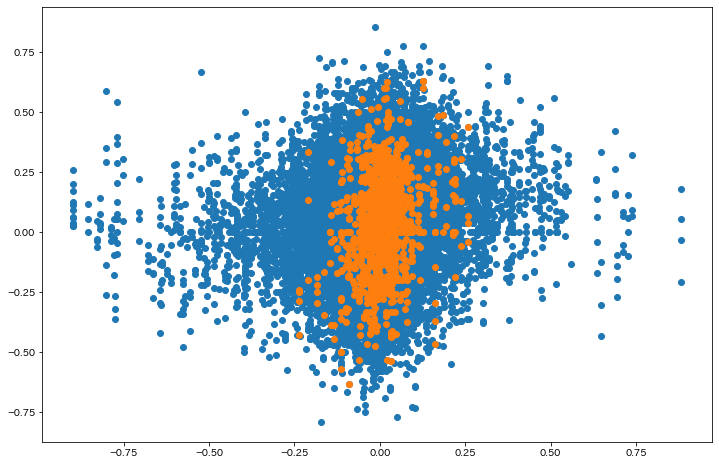

パルプ・紙
企業数 19
相関係数 0.095487272557014
感情値平均 0.04039409190154606
達成度平均 -0.02048572059635703


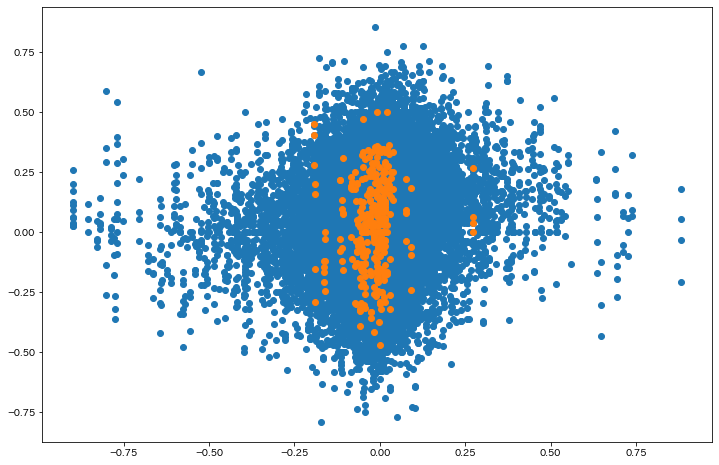

その他製品
企業数 76
相関係数 0.20413581355949145
感情値平均 0.026023728438429556
達成度平均 -0.009563867463953414


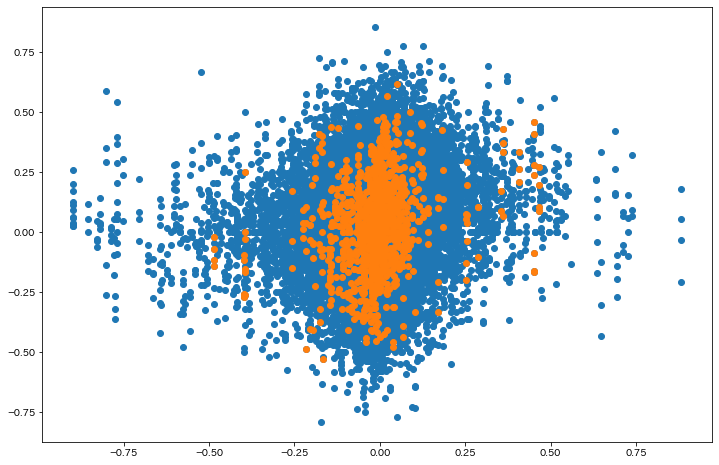

医薬品
企業数 23
相関係数 0.08921575442324099
感情値平均 0.022067974973255366
達成度平均 -0.011265609430389508


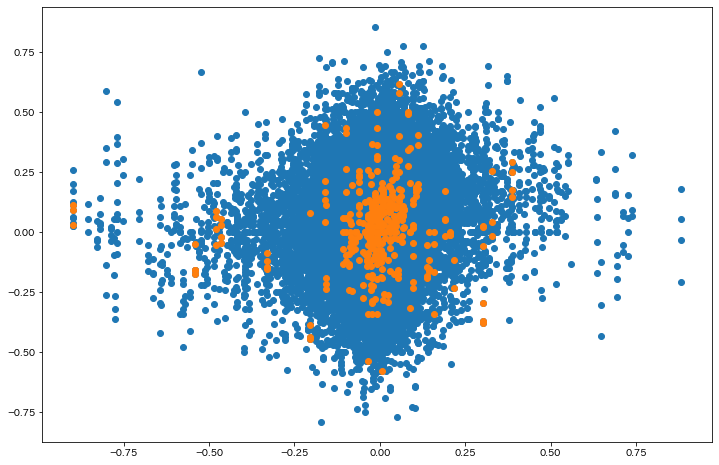

ゴム製品
企業数 8
相関係数 0.030673492247585622
感情値平均 0.038620213035354296
達成度平均 0.024212650883921907


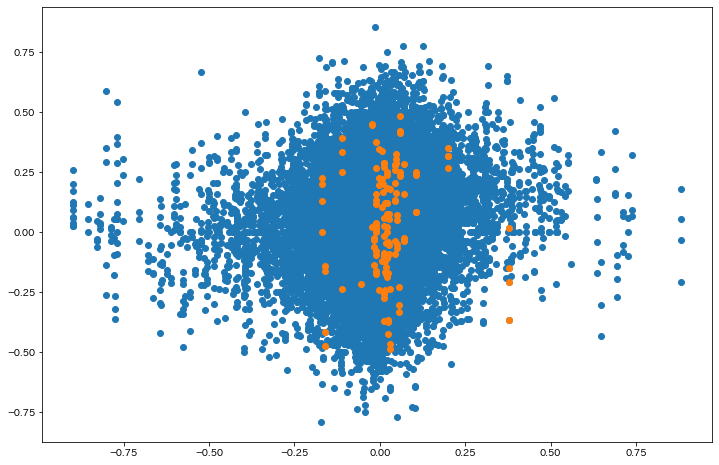

精密機器
企業数 34
相関係数 0.1700923029909564
感情値平均 0.08801617395291018
達成度平均 -0.028760016881596205


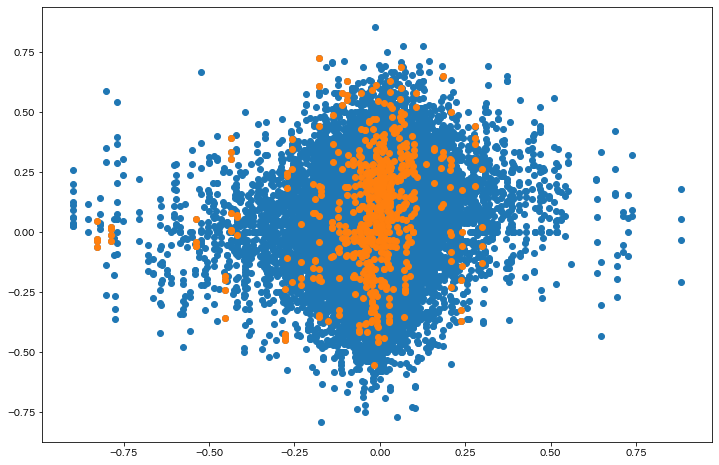

ガラス・土石製品
企業数 39
相関係数 0.19456084501627732
感情値平均 0.05432873654048164
達成度平均 0.0232098569331463


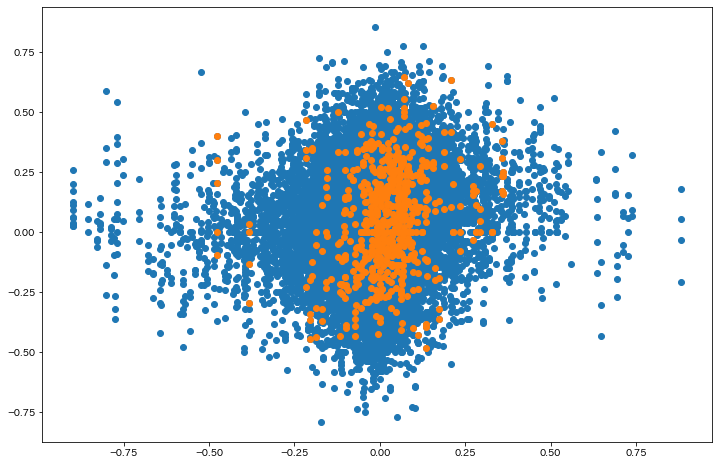

鉄鋼
企業数 28
相関係数 0.32529483226459305
感情値平均 0.06265742237492036
達成度平均 0.03539004580080692


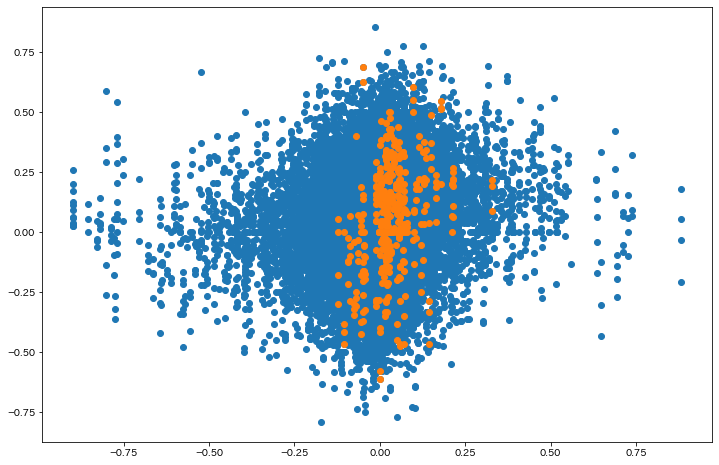

輸送用機器
企業数 58
相関係数 0.10042541486721036
感情値平均 0.019596324291056712
達成度平均 0.007638291685369443


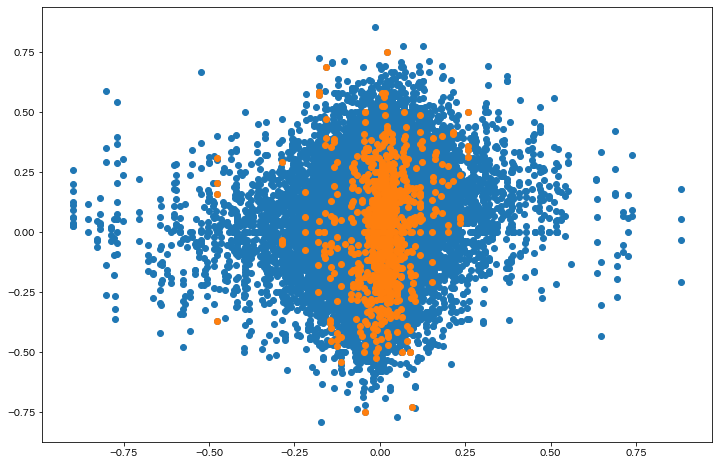

倉庫・運輸関連
企業数 16
相関係数 0.28362528322203645
感情値平均 0.0710800883328387
達成度平均 0.03224667785189201


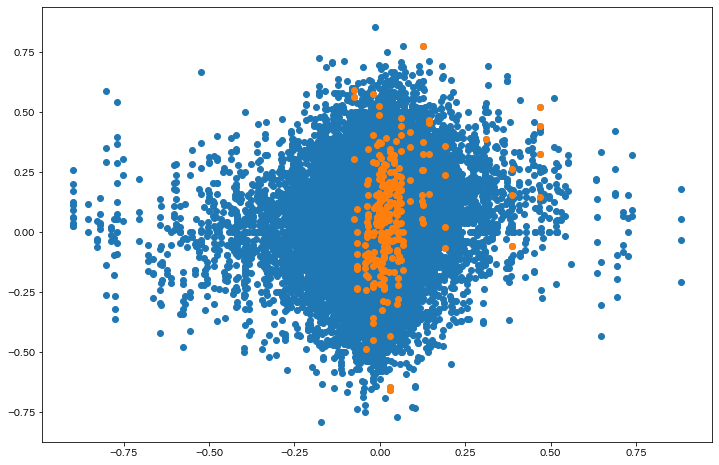

海運業
企業数 10
相関係数 0.1897047850376141
感情値平均 0.07442651620875425
達成度平均 0.05360653943356045


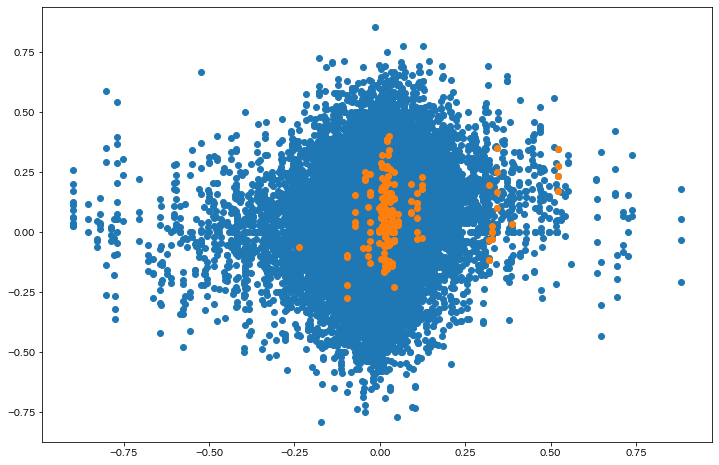

空運業
企業数 4
相関係数 0.25569130867839424
感情値平均 0.05667809289351755
達成度平均 -0.004466981790719061


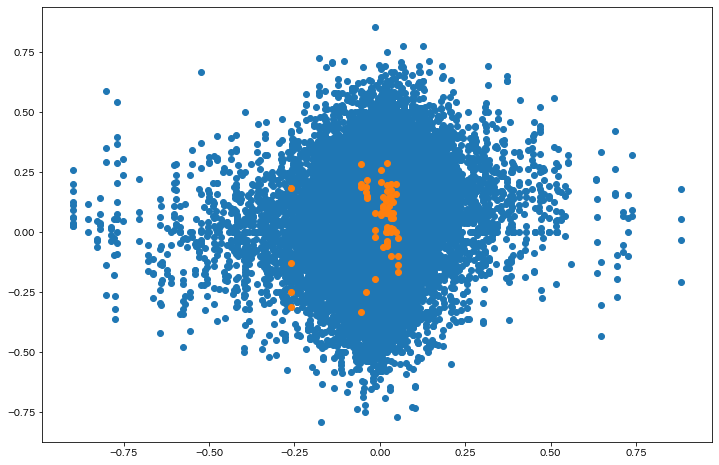

電気・ガス業
企業数 17
相関係数 0.10183271737408482
感情値平均 0.044052554434380435
達成度平均 0.021566104654813276


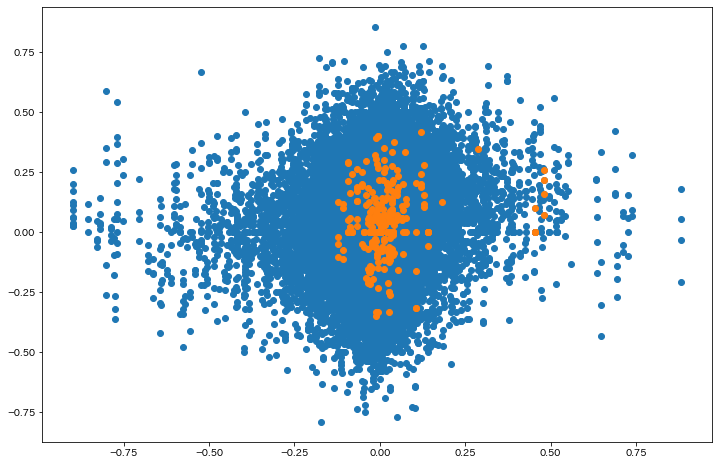

In [48]:
for clas in score_dic.keys():
    print(clas)
    print('企業数',class_dic[clas])
    print('相関係数',np.corrcoef([achieve_dic[clas],score_dic[clas]])[0][1])
    print('感情値平均',mean(score_dic[clas]))
    print('達成度平均',mean(achieve_dic[clas]))
    fig = plt.figure(figsize=(12, 8)) #...1
    plt.scatter(achieve,score_all)
    plt.scatter(achieve_dic[clas],score_dic[clas])
    plt.show()

水産・農林業


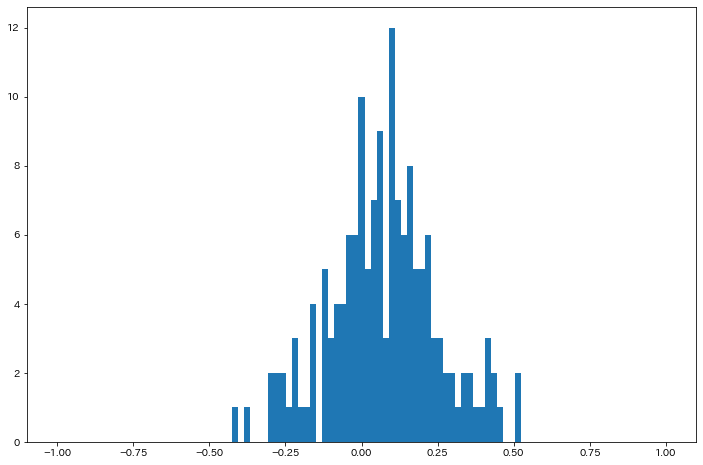

建設業


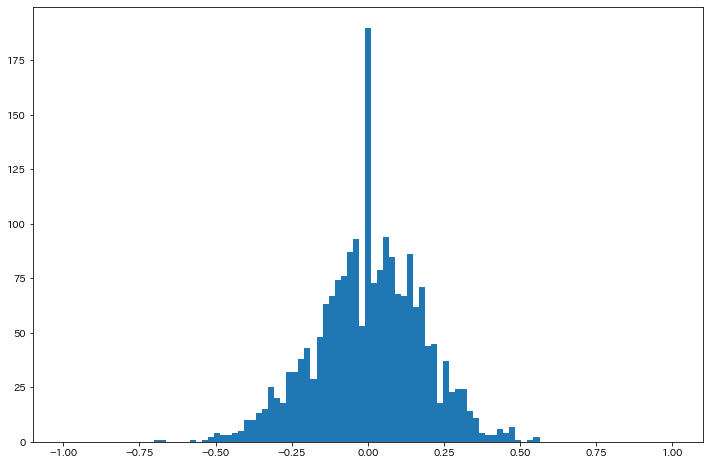

非鉄金属


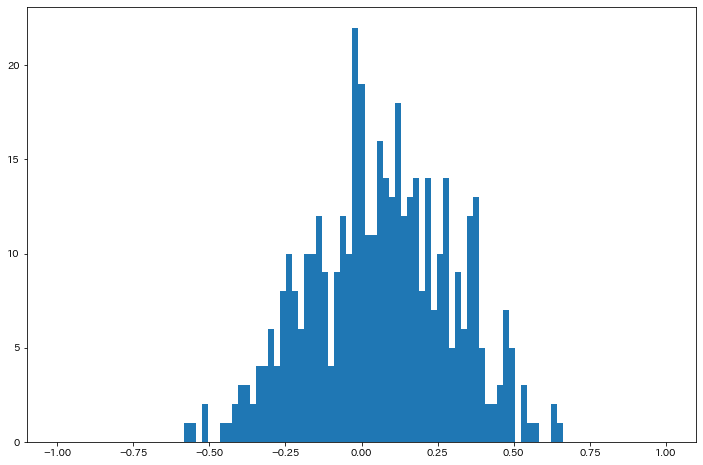

鉱業


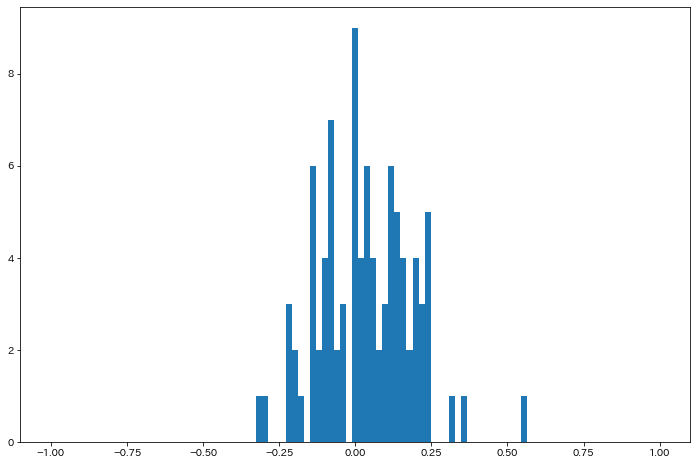

機械


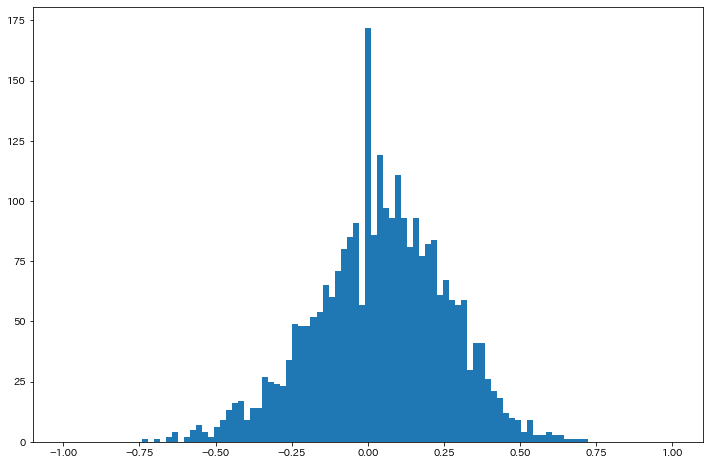

情報・通信業


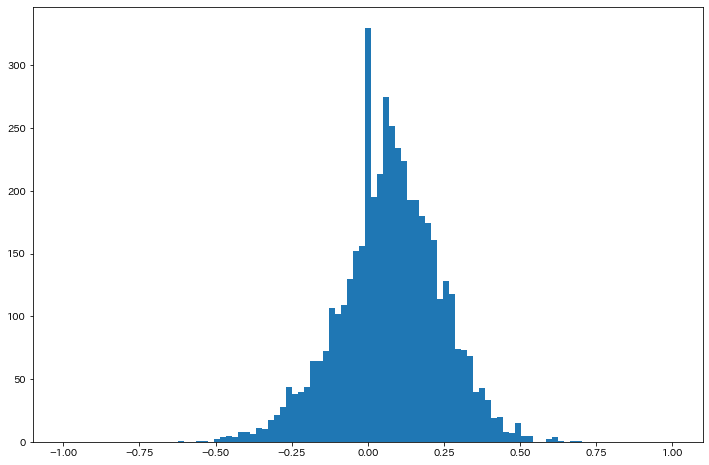

食料品


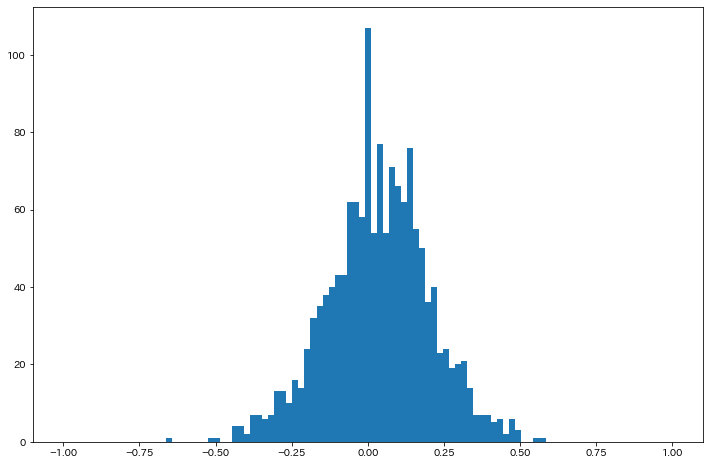

サービス業


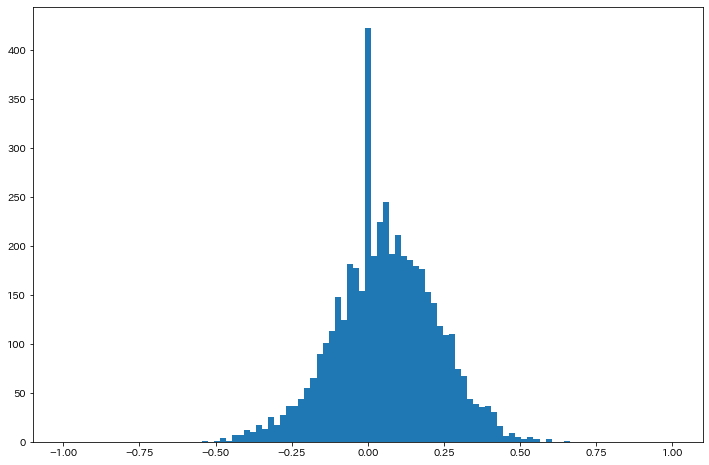

陸運業


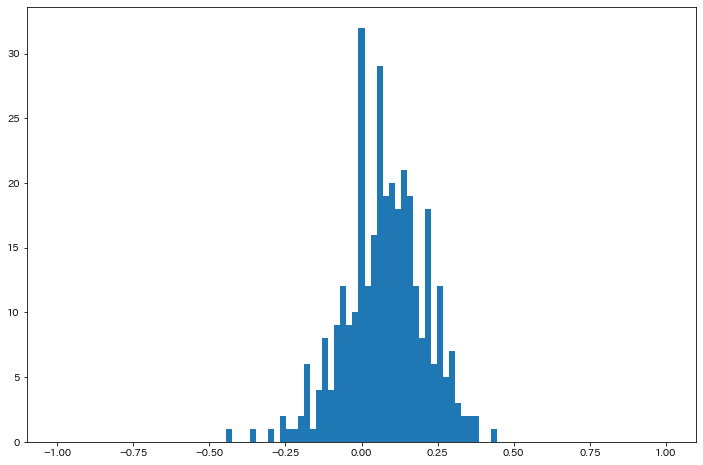

卸売業


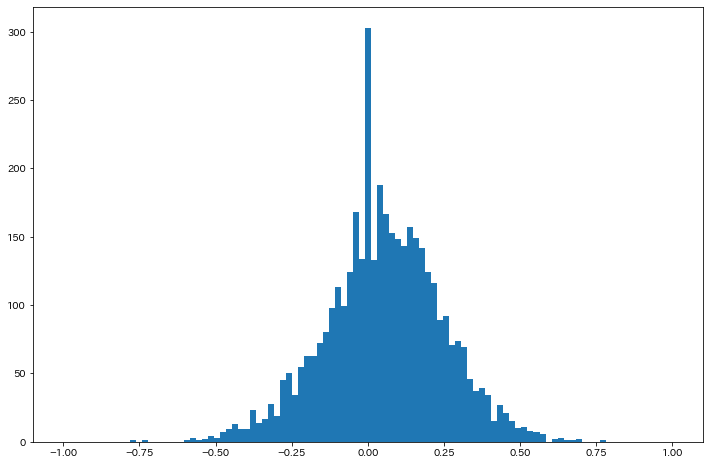

小売業


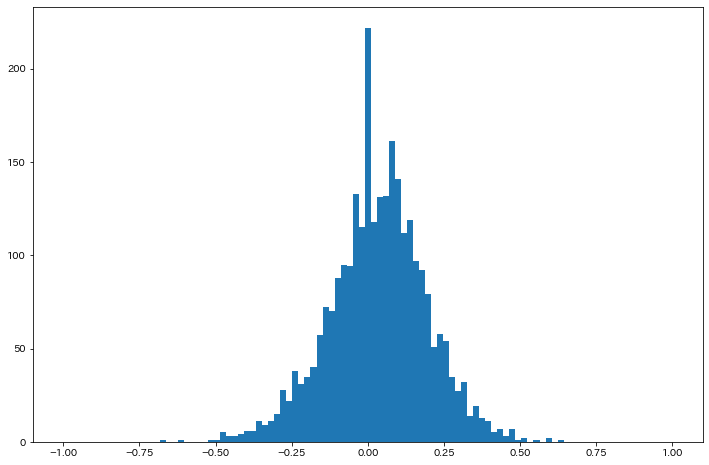

不動産業


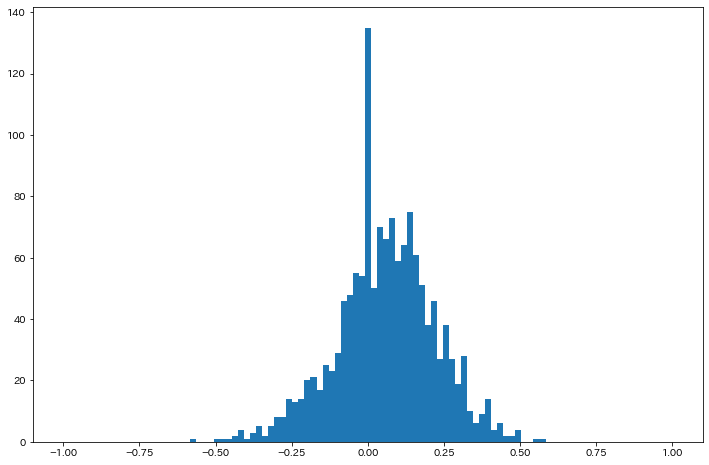

繊維製品


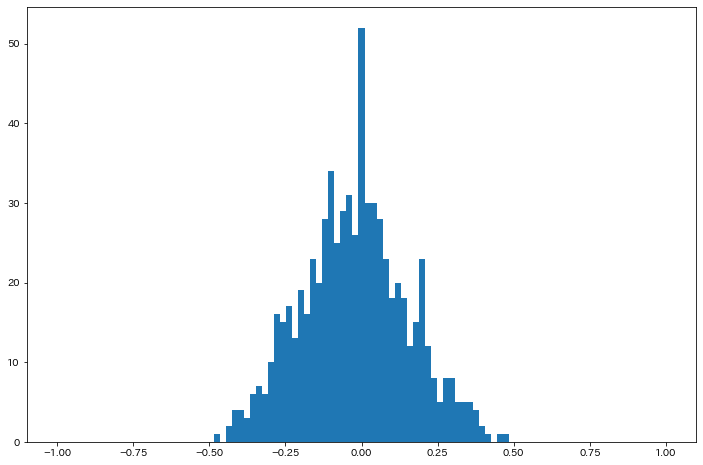

電気機器


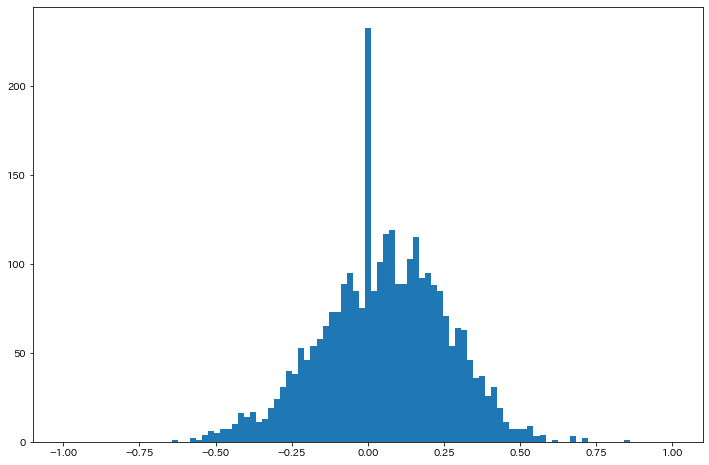

石油・石炭製品


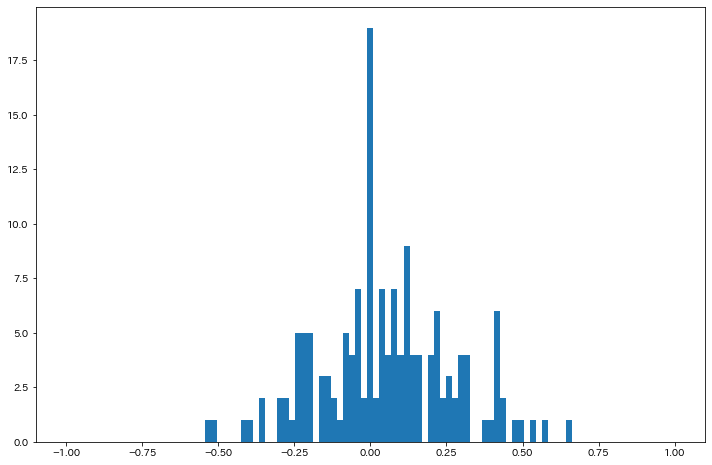

化学


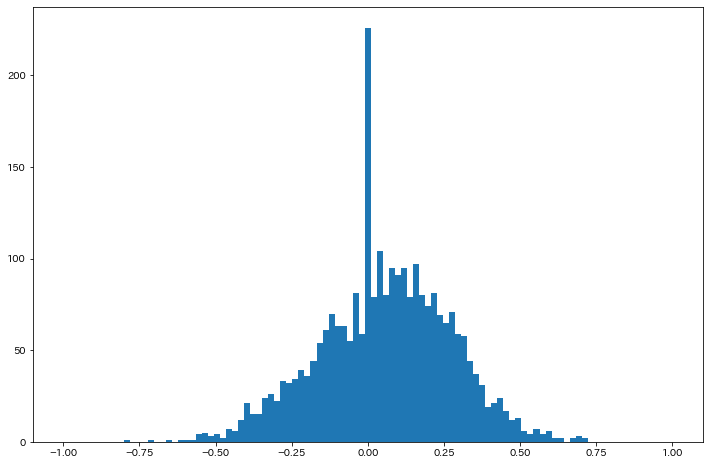

金属製品


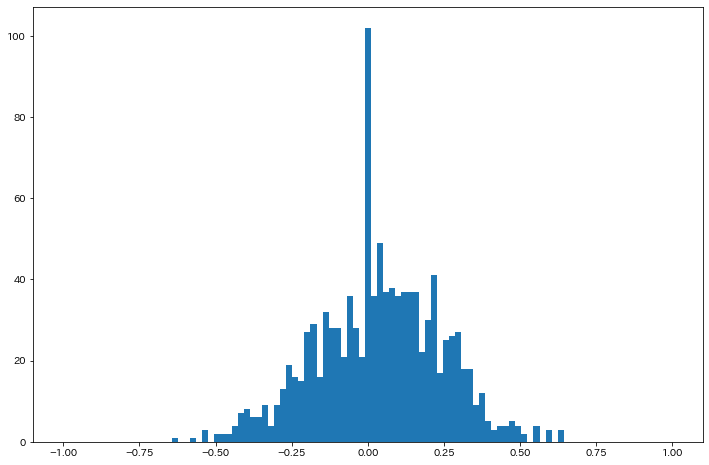

パルプ・紙


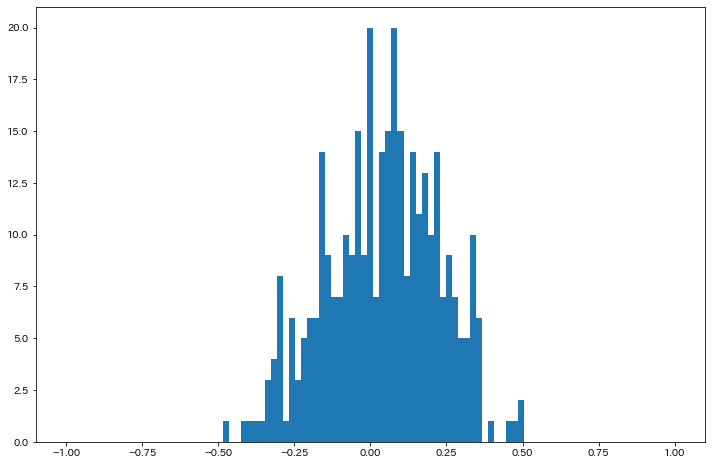

その他製品


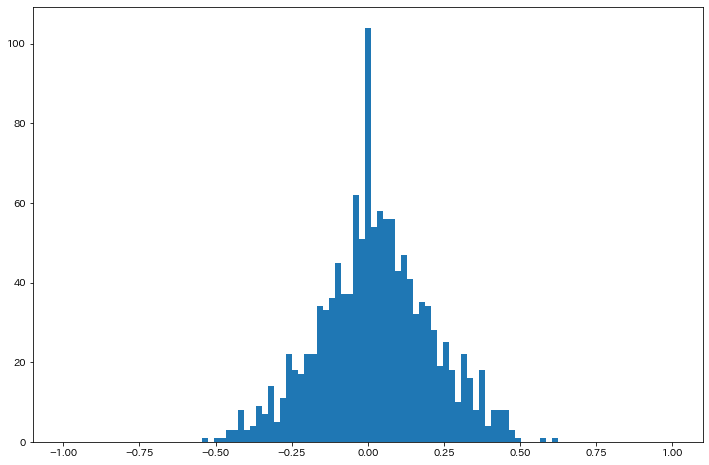

医薬品


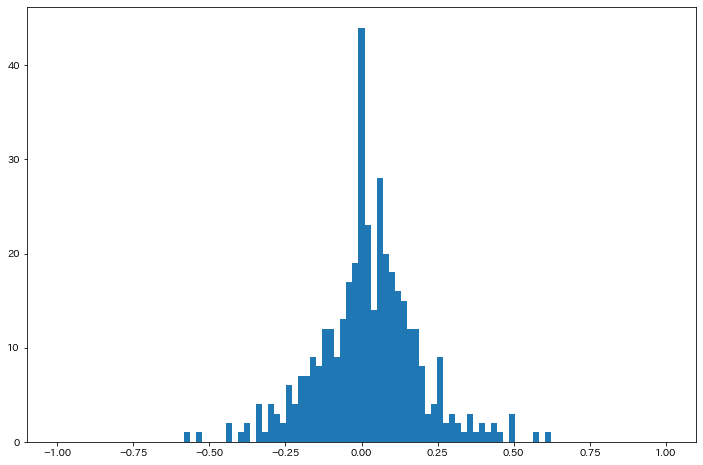

ゴム製品


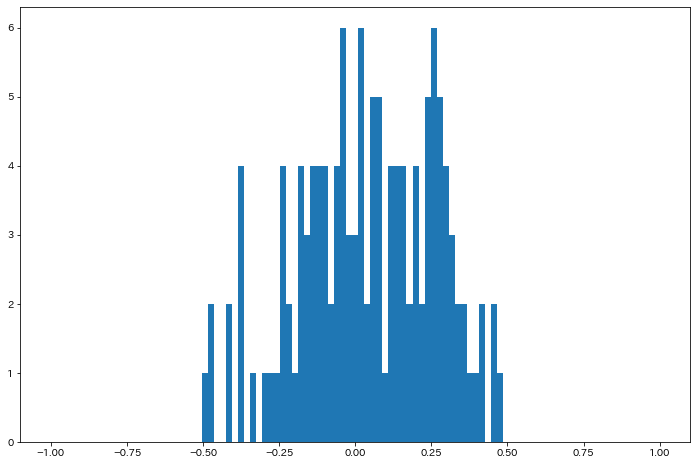

精密機器


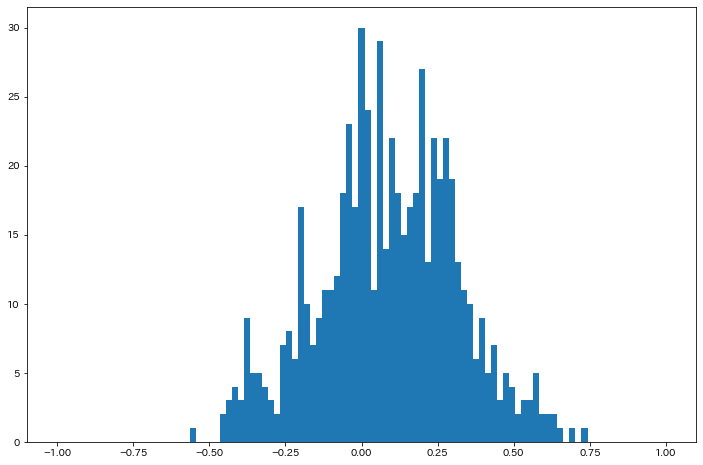

ガラス・土石製品


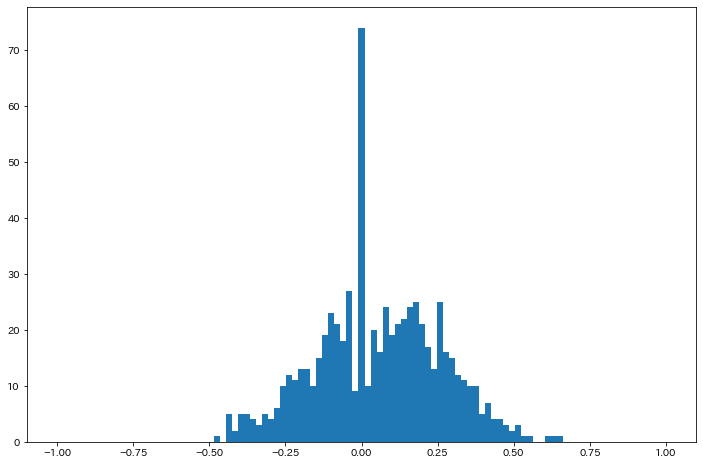

鉄鋼


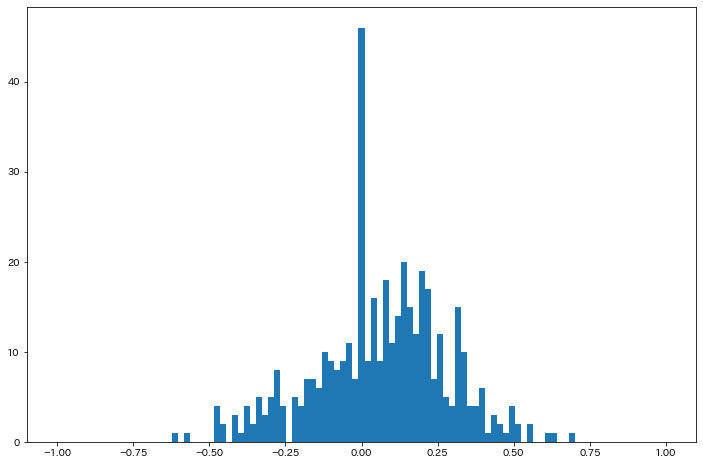

輸送用機器


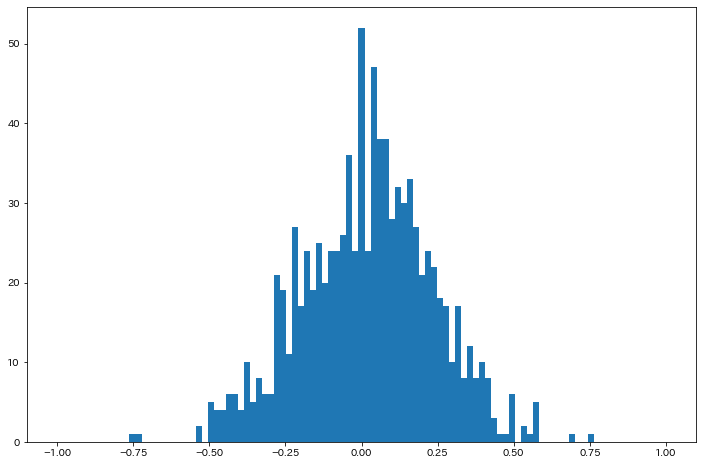

倉庫・運輸関連


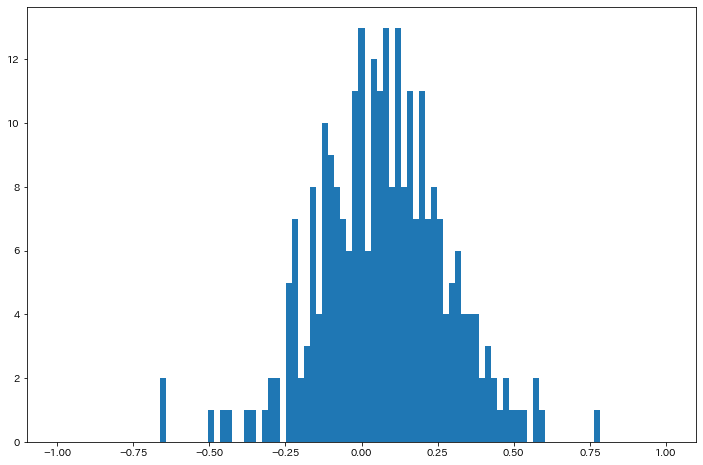

海運業


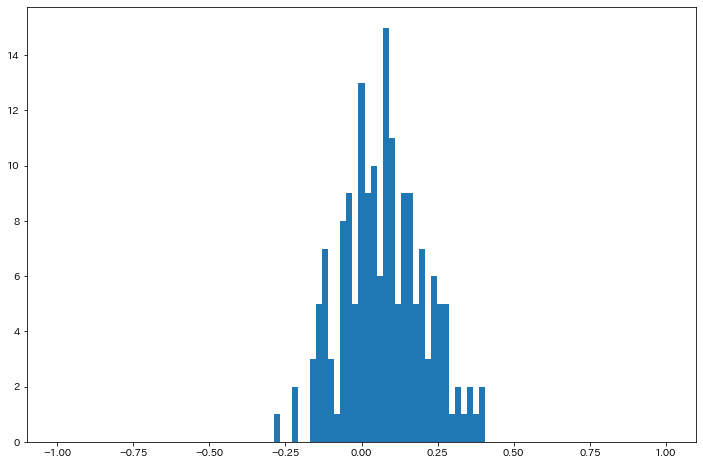

空運業


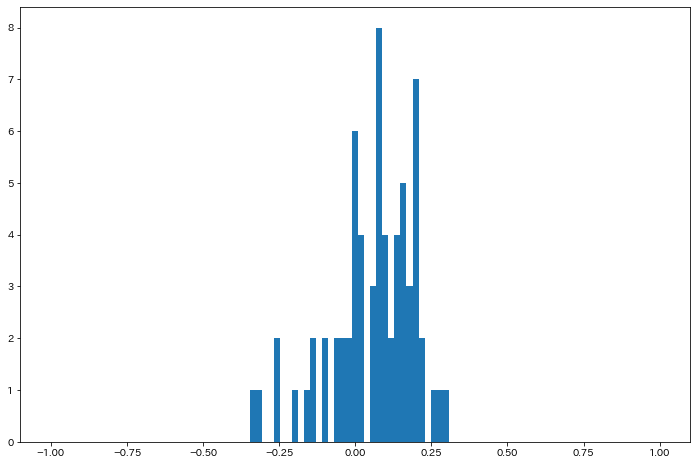

電気・ガス業


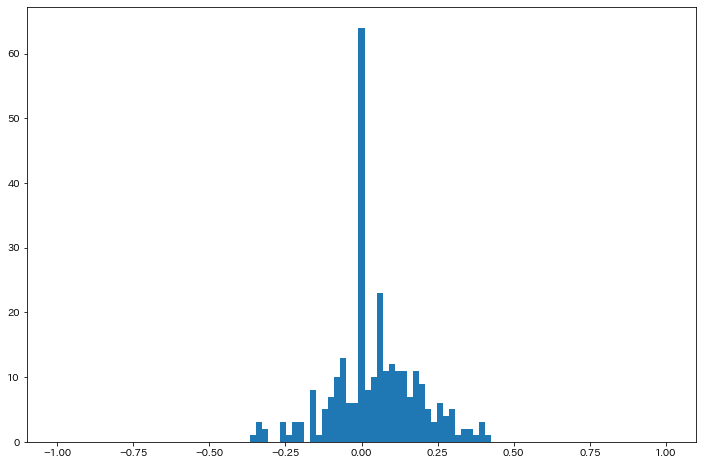

In [38]:
for clas in score_dic.keys():
    print(clas)
    fig = plt.figure(figsize=(12, 8))
    plt.hist(score_dic[clas], bins=101,range=(-1,1))
    plt.show()